<a href="https://colab.research.google.com/github/Tanveer132/Web-scraping-/blob/main/Assignment_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

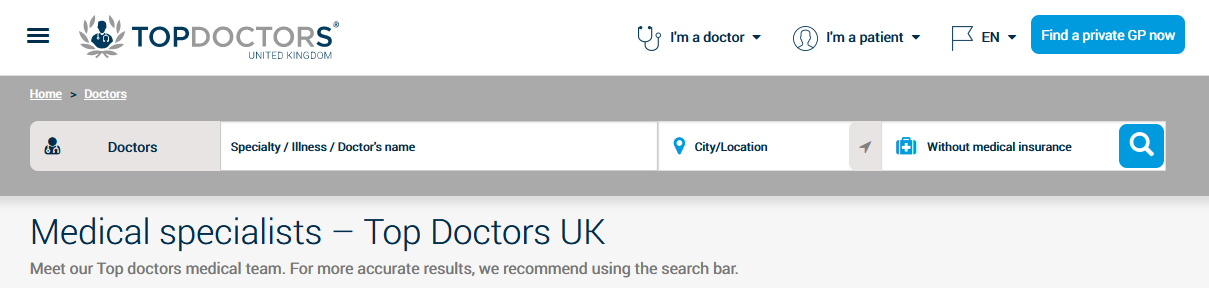

#Society for Health and Medical Technology
##Web Scraping Task : topDoctor

Name - Tanveer Mahammad Shikalgar
Email Id - tanveershikalgar55@gmail.com

    https://www.topdoctors.co.uk/doctor/

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
# !pip3 install requests beautifulsoup4 
from bs4 import BeautifulSoup,SoupStrainer
from urllib.request import urlopen as ureq
import csv
import requests

In [2]:
url = "https://www.topdoctors.co.uk/doctor/"

In [3]:
page=requests.get(url)
page
#Response [200] is successful getting url

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content,'html.parser')

Get list of doctors and then first doctor

In [5]:
#List / Container of all doctors
doctor_container = soup.find_all("section", class_='item bg_paper bottom_margin')
type(doctor_container)

bs4.element.ResultSet

In [6]:
first_doctor=doctor_container[0]
first_doctor

<section class="item bg_paper bottom_margin"><!-- Class opcional 'info_border' para item destacado (Doctor experto en tratamiento) -->
<div id="imgpopover_865_container"><!-- '4' es la id real del doctor -->
<div class="row">
<div class="col-sm-7">
<section>
<a class="h3 item_name" href="/doctor/fahad-gulam-attar" style="line-height: 90%;">
<span itemprop="name">Mr Fahad Gulam Attar</span><br/>
<small><span>Orthopaedic surgeon</span></small>
</a>
</section>
<aside class="star_rating bottom_margin">
<span>
<span class="star_icons little">
<i class="glyphicon glyphicon-star fa-med-distance"></i><i class="glyphicon glyphicon-star fa-med-distance"></i><i class="glyphicon glyphicon-star fa-med-distance"></i><i class="glyphicon glyphicon-star fa-med-distance"></i><i class="glyphicon glyphicon-star fa-med-distance"></i> </span>
</span> <a class="link_sm" href="/doctor/fahad-gulam-attar#valoraciones">
                                Read all reviews (12)
                            </a>
</asid

Extract data for single doctor 

In [7]:
# name=first_doctor.find(attrs={"class":'h3 item_name'}).find('span', itemprop="name").text.replace("\n","")
# name

'Mr Fahad Gulam Attar'

In [ ]:
# # <class>='h3 item_name'--> <small> --> degree

# degree = first_doctor.find('div',class_='col-sm-7').find(attrs={"class":'h3 item_name'}).find('small').text.replace("\n","")
# degree

'Ophthalmologist'

In [ ]:
# expertin = first_doctor.find(attrs={"class":'list-unstyled bottom_padding h4 highlight_theme no_margins'}).text.replace("\n","")
# expertin


'CataractsEpiretinal membrane Macular hole Retinal detachmentEye floatersMacular degeneration (AMD)'

In [ ]:
# address = first_doctor.find('div', class_='media-body').text.replace("\n\n",',').replace("\n","")
# address

'Moorfields Eye Hospital,Central London'

In [ ]:
# about=first_doctor.find('div', class_='col-xs-4 bottom_margin').text.replace("\n","")
# about

'Professional statementProfessor James Bainbridge is a leading\xa0London-based ophthalmologist. He specialises in managing conditions of the retina\xa0including\xa0retinal detachment,\xa0epiretinal membr...See more'

In [ ]:
# reviews = first_doctor.find('a',class_='link_sm').text
# if reviews == True:
#   reviews=reviews.text.replace("\n","").replace("  ","")
# reviews

'\n                                Read all reviews (3)\n                            '

In [ ]:
# ratings = first_doctor.find('div',class_='col-sm-7').find('span',class_='star_icons little').findAll('i',class_='glyphicon glyphicon-star fa-med-distance')
# len(ratings)
# ratings = first_doctor.find('div',class_='col-sm-7').find('span',class_='star_icons little').findAll('i',class_='glyphicon glyphicon-star fa-med-distance')
# print(bool(ratings))
# ratings

In [ ]:
# online_book= first_doctor.find('section',class_='side_padding item_details_sidebar_buttons').find('a',class_='btn btn_highlight calendar_ico btn_action btn-block').text
# online_book=online_book.replace("  ","").replace("\n","")
# online_book= bool(first_doctor.find('section',class_='side_padding item_details_sidebar_buttons').find('a',class_='btn btn_highlight calendar_ico btn_action btn-block').text
# )
# online_book

In [ ]:
# consult= first_doctor.find('section',class_='side_padding item_details_sidebar_buttons').find('a',class_='btn btn_dark phone_ico btn_action btn-block').text
# consult=consult.replace("  ","").replace("\n","")
# consult

In [10]:
profile=first_doctor.find('section', class_='item_details_sidebar').find('a')
profile=url[:-8]+profile['href']
profile

'https://www.topdoctors.co.uk/doctor/fahad-gulam-attar'

In [ ]:
# image =  first_doctor.findAll('img')
# for item in image:image=item['src']
# image=url[:-1]+image
# image

In [38]:
# clinic = first_doctor.find('div', class_='media-body')
# clinic=clinic.text.split("\n\n")[0].replace("\n","")

'BMI Alexandra Hospital'

Mining data from every page available on the website

In [39]:
names=[]
degrees=[]
image=[]
about=[]
specialization=[]
address=[]
ratings=[]
on_book=[]
on_consult=[]
profile=[]
clinic_name=[]

url = "https://www.topdoctors.co.uk/doctor/"
page=requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
doctor_container = soup.find_all("section", class_='item bg_paper bottom_margin')
for doctors in doctor_container:
  nm=doctors.find(attrs={"class":'h3 item_name'}).find('span', itemprop="name").text.replace("\n","")
  names.append(nm)

  img =  doctors.findAll('img')
  for item in img:img=item['src']
  img=url[:-1]+img
  image.append(img)

  deg = doctors.find('div',class_='col-sm-7').find(attrs={"class":'h3 item_name'}).find('small').text.replace("\n","")
  degrees.append(deg)

  abt = doctors.find('div', class_='col-xs-4 bottom_margin').text.replace("\n","")
  about.append(abt)

  expert = doctors.find(attrs={"class":'list-unstyled bottom_padding h4 highlight_theme no_margins'}).text.replace("\n","")
  specialization.append(expert)

  add = doctors.find('div', class_='media-body').text.replace("\n\n",',').replace("\n","")
  address.append(add)

  profiles=doctors.find('section', class_='item_details_sidebar').find('a')
  profiles=url[:-1]+profiles['href']
  profile.append(profiles)

  clinic = doctors.find('div', class_='media-body')
  clinic=clinic.text.split("\n\n")[0].replace("\n","")
  clinic_name.append(clinic)

  book= doctors.find('div',class_='row hidden-xs').find('a',class_='btn btn_highlight calendar_ico btn_action btn-block')
  if bool(book) == True :
    book=book.text.replace("  ","").replace("\n","")
    if (book == "Book online"):
      on_book.append("Y")
    else:
      on_book.append("N")

  consult= doctors.find('div',class_='row hidden-xs').find('a',class_='btn btn_dark phone_ico btn_action btn-block')
  if bool(consult) == True :
    consult=consult.text.replace("  ","").replace("\n","")
    if consult == "Call to make an appointment" :
      on_consult.append("Y")
    else :
      on_consult.append("N")

  

In [40]:
for i in range(2,5):
  url = "https://www.topdoctors.co.uk/doctor/" +"page/"+ str(i)
  print(url)
  page=requests.get(url)
  soup = BeautifulSoup(page.content,'html.parser')
  for doctors in doctor_container:
    nm=doctors.find(attrs={"class":'h3 item_name'}).find('span', itemprop="name").text.replace("\n","")
    names.append(nm)

    deg = doctors.find('div',class_='col-sm-7').find(attrs={"class":'h3 item_name'}).find('small').text.replace("\n","")
    degrees.append(deg)

    img =  doctors.findAll('img')
    for item in img:img=item['src']
    img=url[:-1]+img
    image.append(img)

    abt = doctors.find('div', class_='col-xs-4 bottom_margin').text.replace("\n","")
    about.append(abt)

    expert = doctors.find(attrs={"class":'list-unstyled bottom_padding h4 highlight_theme no_margins'}).text.replace("\n","")
    specialization.append(expert)

    add = doctors.find('div', class_='media-body').text.replace("\n\n",',').replace("\n","")
    address.append(add)

    profiles=doctors.find('section', class_='item_details_sidebar').find('a')
    profiles=url[:-1]+profiles['href']
    profile.append(profiles)

    clinic = doctors.find('div', class_='media-body')
    clinic=clinic.text.split("\n\n")[0].replace("\n","")
    clinic_name.append(clinic)

    book= doctors.find('div',class_='row hidden-xs').find('a',class_='btn btn_highlight calendar_ico btn_action btn-block')
    if bool(book) == True :
      book=book.text.replace("  ","").replace("\n","")
      if (book == "Book online"):
        on_book.append("Y")
      else:
        on_book.append("N")

    consult= doctors.find('div',class_='row hidden-xs').find('a',class_='btn btn_dark phone_ico btn_action btn-block')
    if bool(consult) == True :
      consult=consult.text.replace("  ","").replace("\n","")
      if consult == "Call to make an appointment" :
        on_consult.append("Y")
      else :
        on_consult.append("N")

https://www.topdoctors.co.uk/doctor/page/2
https://www.topdoctors.co.uk/doctor/page/3
https://www.topdoctors.co.uk/doctor/page/4


Discribing Dataframe

In [41]:
df=pd.DataFrame({"Name":pd.Series(names) ,"Photo":pd.Series(image),"Degree":pd.Series(degrees),"About":pd.Series(about),
                 "Link to Profile":pd.Series(profile),"Specialization":pd.Series(specialization),
                 "Address":pd.Series(address),"Online_Book":pd.Series(on_book),"Online_cunsult":pd.Series(on_consult)})
df

,Name,Photo,Degree,About,Link to Profile,Specialization,Address,Online_Book,Online_cunsult
0,Mr Neil Bateman,https://www.topdoctors.co.uk/doctor/files/Doct...,Otolaryngologist,Professional statementMr Neil Bateman is a hig...,https://www.topdoctors.co.uk/doctor/doctor/nei...,Ear infectionHearing loss Glue ear Tonsillitis...,"BMI The Alexandra Hospital,Cheadle",Y,Y
1,Professor Francesco Rubino,https://www.topdoctors.co.uk/doctor/files/Doct...,Surgeon,Professional statementProfessor Francesco Rubi...,https://www.topdoctors.co.uk/doctor/doctor/fra...,Gastric sleeveDiabetes surgeryBariatric surger...,"King's College Hospital,Central London",Y,Y
2,Miss Luxmi Velauthar,https://www.topdoctors.co.uk/doctor/files/Doct...,Obstetrician - gynaecologist,Professional statementMiss Luxmi Velauthar is ...,https://www.topdoctors.co.uk/doctor/doctor/lux...,Fetal medicinePremature birthRecurrent miscarr...,"LycaHealth (Canary Wharf),East London",Y,Y
3,Professor Hedley Emsley,https://www.topdoctors.co.uk/doctor/files/Doct...,Neurologist,Professional statementProfessor Hedley Emsley ...,https://www.topdoctors.co.uk/doctor/doctor/hed...,Neurological treatments StrokeCerebrovascular ...,"Greater Lancashire Hospital,Preston",Y,Y
4,Dr Rejin Khafaf,https://www.topdoctors.co.uk/doctor/files/Doct...,Dentist,Professional statementDr Rejin Khafaf is an ex...,https://www.topdoctors.co.uk/doctor/doctor/rej...,Cosmetic dentistry (aesthetic dentistry)Invisa...,"Harley Street Dental Studio,W1G Marylebone London",Y,Y
5,Dr Sherif Raouf,https://www.topdoctors.co.uk/doctor/files/Doct...,Clinical oncologist,Professional statementDr Sherif Raouf is a lea...,https://www.topdoctors.co.uk/doctor/doctor/she...,Bowel cancerStomach cancerPancreatic cancer Oe...,"Spire Hartswood Hospital,Brentwood",Y,Y
6,Dr Rahul Guru,https://www.topdoctors.co.uk/doctor/files/Doct...,Pain management specialist,Professional statementDr Rahul Guru is a top c...,https://www.topdoctors.co.uk/doctor/doctor/rah...,Back pain WhiplashMigraineNeck pain Sciatica N...,"Nuffield Health Cardiff Bay Hospital,Cardiff",Y,Y
7,Mr Pramod Achan,https://www.topdoctors.co.uk/doctor/files/Doct...,Orthopaedic surgeon,Professional statementMr Pramod Achan is a lea...,https://www.topdoctors.co.uk/doctor/doctor/pra...,Hip Hip prosthesis Hip arthroscopy Sport surge...,"The Princess Grace Hospital,Central London",Y,Y
8,Mr Bataung Mokete,https://www.topdoctors.co.uk/doctor/files/Doct...,Ophthalmologist,Professional statementMr Bataung Mokete is a h...,https://www.topdoctors.co.uk/doctor/doctor/bat...,RetinaCataractsVitreous Surgery Retinal vein o...,"Spire Leeds Hospital,Leeds",Y,Y
9,Dr Moumita Chattopadhyay,https://www.topdoctors.co.uk/doctor/files/Doct...,Dermatologist,Professional statementDr Moumita Chattopadhyay...,https://www.topdoctors.co.uk/doctor/doctor/mou...,Acne Skin cancerMolesLichen sclerosusPsoriasis...,"BMI The Priory Hospital,Birmingham",Y,Y


Final csv result

In [43]:
df.to_csv('/content/USAdoctors.csv')